In [3]:
import os 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith('train'):
            train_file = os.path.join(dirname, filename)
        elif filename.startswith('test'):
            test_file = os.path.join(dirname, filename)
        elif filename.startswith('sample'):
            sample_file = os.path.join(dirname, filename)

In [5]:
train=pd.read_csv(train_file)
test=pd.read_csv(test_file)
sample=pd.read_csv(sample_file)

In [6]:
train.head

<bound method NDFrame.head of             id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        C

In [7]:
#drop na coluna id
train.drop(columns=['id'], inplace=True)

In [8]:
train.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


In [10]:
train.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
train.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


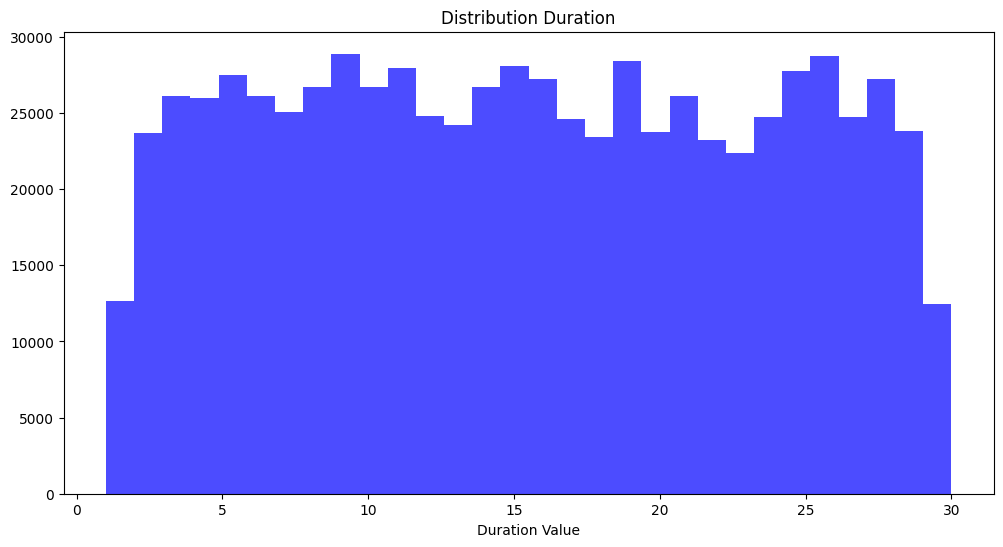

In [12]:
plt.figure(figsize=(12, 6))
plt.title('Distribution Duration')
plt.hist(train['Duration'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Duration Value');

In [ ]:
colunasb=list(train.columns)
colunas.remove('Calories')

In [24]:
colunas

['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

C:\Users\gpira\AppData\Local\Temp\ipykernel_19256\302645195.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


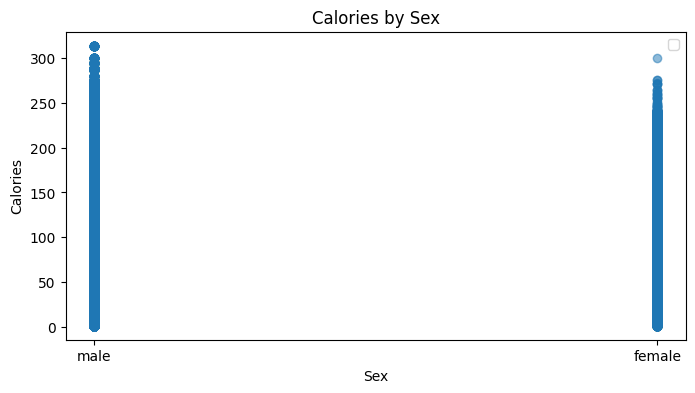

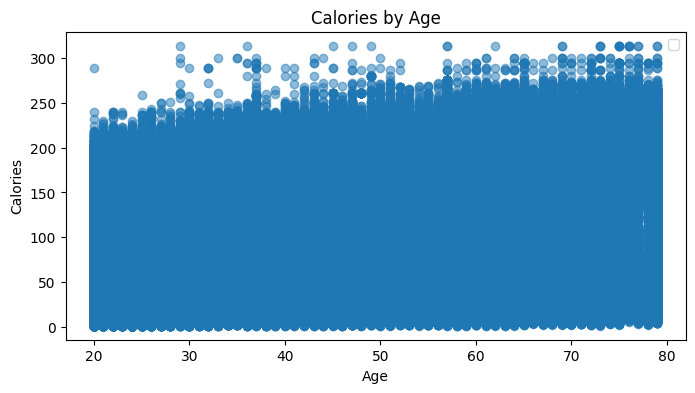

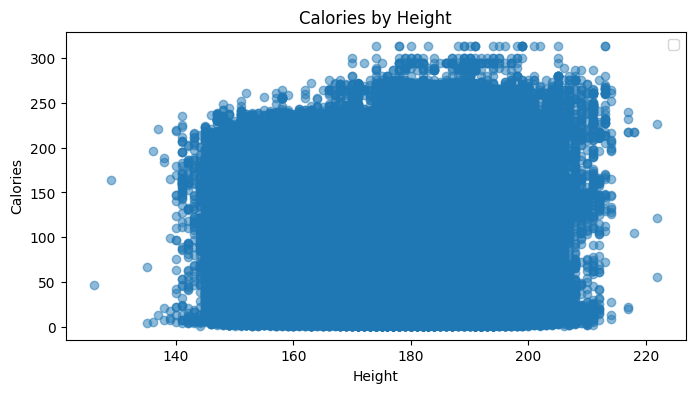

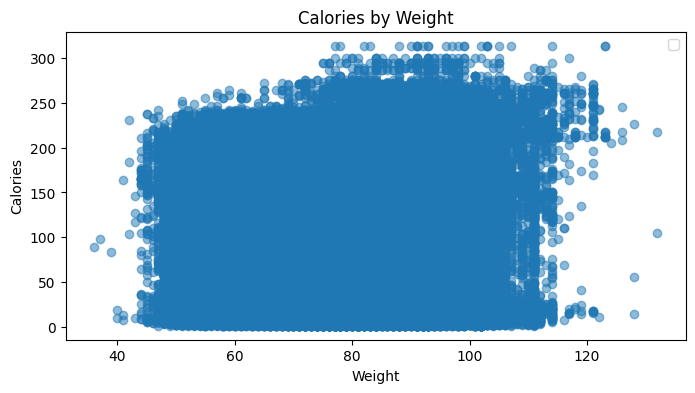

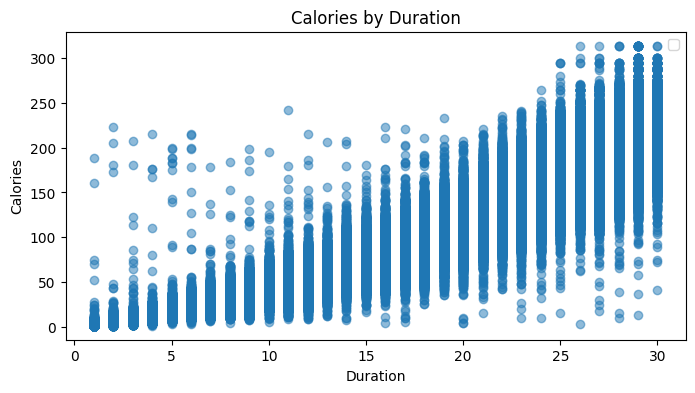

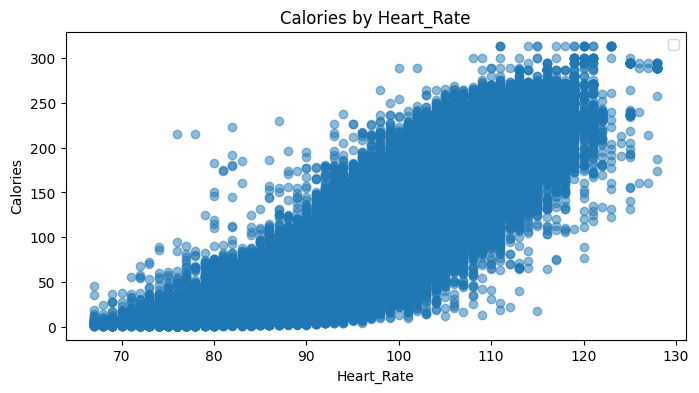

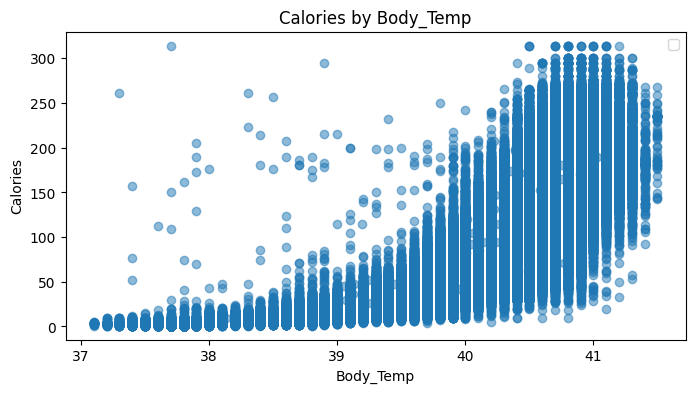

In [30]:
grouped={}
for category in colunas:
    grouped[category]= train.groupby(category)['Calories'].mean().reset_index()

for category in colunas:
    



    plt.figure(figsize=(8, 4))
    plt.scatter(train[category], train['Calories'], alpha=0.5)
    plt.title('Calories by {}'.format(category))
    plt.xlabel(category)
    
    plt.ylabel('Calories')
    plt.legend()
    plt.show()
    
